In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mb-tst/data.csv


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Читаем данные
data_df = pd.read_csv('/kaggle/input/mb-tst/data.csv')

In [4]:
# Посмотрим на данные нескольких случайных дат
data_df.sample(5).transpose()

,22666,13322,9675,29349,10265
Unnamed: 0,22666,13322,9675,29349,10265
Date&Time,2023-08-03 10:00:00,2022-07-10 02:00:00,2022-02-08 03:00:00,2024-05-07 21:00:00,2022-03-04 17:00:00
feature_1,NaN,NaN,NaN,1883.432,NaN
feature_2,77.69157,NaN,NaN,2.35429,306.0577
feature_3,21.18861,4.70858,NaN,129.48595,NaN
feature_4,NaN,NaN,NaN,NaN,NaN
feature_5,NaN,NaN,NaN,NaN,NaN
feature_6,149219.60878,81566.73134,39236.59714,442545.30846,46581.98194
feature_7,NaN,NaN,NaN,NaN,NaN
feature_8,37.66864,NaN,NaN,NaN,4.70858


In [5]:
# Дескрайбим
data_df.describe()

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_10,feature_11,feature_12,feature_13,target
count,30361.000000,2878.000000,9755.000000,17052.000000,865.000000,822.000000,22129.000000,3351.000000,3890.000000,273.000000,9296.000000,7660.000000,30361.000000,30361.000000
mean,15180.000000,1692.258417,120.925071,45.552861,79.724697,6.979811,152972.077556,25.276827,158.953309,314.224413,238.896107,209.721137,3.000758,4.197029
std,8764.610098,1623.352828,197.624432,98.096399,53.484460,4.618812,130095.859050,49.681594,454.287818,222.383753,428.761651,391.396431,2.001391,24.218414
min,0.000000,235.429000,2.354290,2.354290,2.354290,2.354290,2530.861750,2.354290,2.354290,2.354290,2.354290,2.354290,0.000000,0.000000
25%,7590.000000,470.858000,16.480030,11.771450,32.960060,2.354290,52420.621140,4.708580,4.708580,155.383140,28.251480,32.960060,1.000000,0.000000
50%,15180.000000,1177.145000,49.440090,25.897190,77.691570,4.708580,116553.835030,11.771450,18.834320,266.034770,77.691570,82.400150,3.000000,0.000000
75%,22770.000000,2354.290000,145.965980,54.148670,117.714500,9.417160,201249.417780,23.542900,110.651630,433.189360,277.806220,226.011840,5.000000,0.000000
max,30360.000000,11771.450000,2620.324770,5718.570410,242.491870,30.605770,490883.590740,753.372800,7326.550480,1228.939380,10172.887090,8275.329350,6.000000,1238.000000


In [6]:
# В фичах много пропусков
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30361 entries, 0 to 30360
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30361 non-null  int64  
 1   Date&Time   30361 non-null  object 
 2   feature_1   2878 non-null   float64
 3   feature_2   9755 non-null   float64
 4   feature_3   17052 non-null  float64
 5   feature_4   865 non-null    float64
 6   feature_5   822 non-null    float64
 7   feature_6   22129 non-null  float64
 8   feature_7   3351 non-null   float64
 9   feature_8   3890 non-null   float64
 10  feature_10  273 non-null    float64
 11  feature_11  9296 non-null   float64
 12  feature_12  7660 non-null   float64
 13  feature_13  30361 non-null  int64  
 14  target      30361 non-null  float64
dtypes: float64(12), int64(2), object(1)
memory usage: 3.5+ MB


In [7]:
# Переведем поле с датой в соответствующий тип
data_df['Date&Time'] = pd.to_datetime(data_df['Date&Time'])

In [8]:
# Проверяем есть ли повторяющиеся даты. Их нет. То есть у нас всего один ряд.
data_df.groupby(['Date&Time']).size().reset_index(name='cnt_datetime').query('cnt_datetime > 1')

,Date&Time,cnt_datetime


<Axes: >

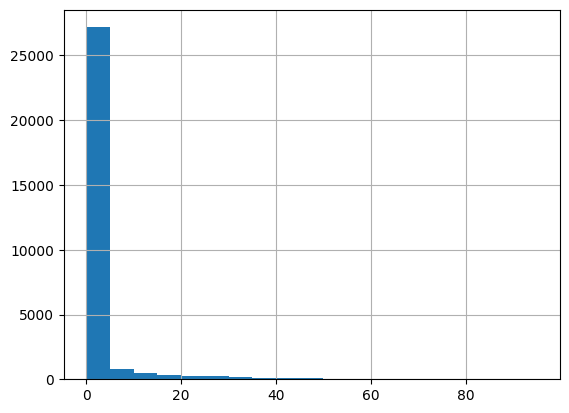

In [9]:
# Очень много пустот по часам
data_df['target'].hist(bins=range(0, 100, 5))

<Axes: >

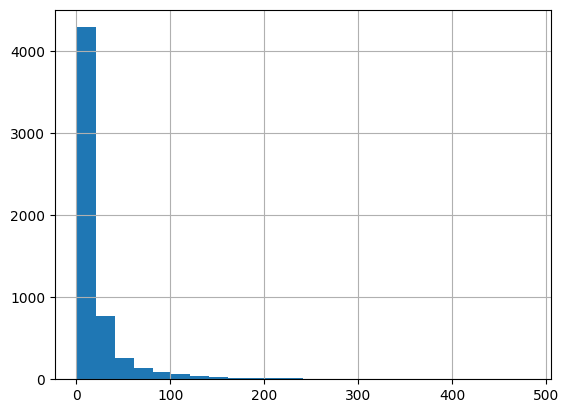

In [10]:
data_df['target'].hist(bins=range(1, 500, 20))

<Axes: xlabel='Date&Time'>

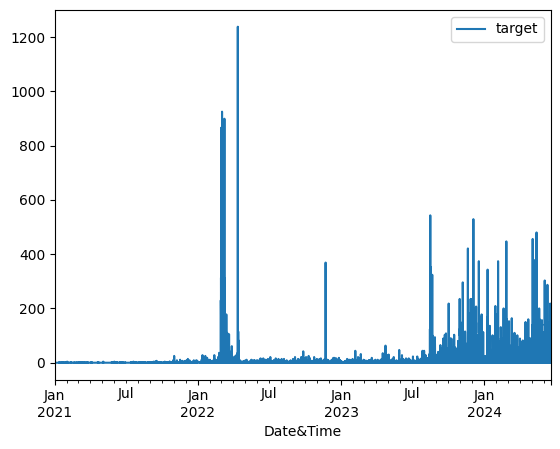

In [11]:
data_df.plot(x='Date&Time', y='target')

In [12]:
# Устанавливаем 'datetime' как индекс
data_df = data_df.set_index('Date&Time')

# Создаем полный временной ряд с шагом в 1 час
full_range = pd.date_range(start=data_df.index.min(), end=data_df.index.max(), freq='h')

# Находим пропуски
missing_dates = full_range.difference(data_df.index)

# Вывод пропущенных дат
print("Пропущенные даты:")
print(missing_dates)

Пропущенные даты:
DatetimeIndex([], dtype='datetime64[ns]', freq='h')


In [13]:
# Посмотрим на график интерактивно
# Первый резкий всплеск произошел 28 февраля 22 года
# Самый пик пришелся на 12.04.2022 в 15:00 (не понятно какой часовой пояс)
# Далее произошло некое структурное изменение в таргете примерно начиная с августа 23
# Видна недельная сезонность. Данные с пн по пт.


fig = px.line(data_df, y='target')
fig.show()

In [14]:
# Нагенерим временных фичей для дальнейших группировок
data_df['day_date'] = pd.to_datetime(data_df.index.date)
data_df['dow'] = data_df['day_date'].dt.weekday + 1
data_df['week_date'] = data_df['day_date'] - pd.to_timedelta(data_df['day_date'].dt.weekday, unit='D')
data_df['mon_date'] = data_df['day_date'].apply(lambda x: x.replace(day=1))
data_df['hour'] = data_df.index.hour
data_df['doy'] = data_df['day_date'].dt.dayofyear
data_df['week_num'] = data_df['day_date'].dt.isocalendar().week
data_df['year'] = data_df['day_date'].dt.year

#### Нарисуем нагрузки по часам.
Выглядит что данные в локальном времени.  
Похоже что тут есть взаимосвязь с временем работы биржи. Работает не круглые сутки

    hour   target
0      0      0.0
1      1      0.0
2      2      0.0
3      3      0.0
4      4    101.0
5      5    117.0
6      6   2193.0
7      7  10892.0
8      8   8828.0
9      9   8572.0
10    10  14855.0
11    11  14512.0
12    12  12683.0
13    13  10162.0
14    14   7648.0
15    15   9430.0
16    16   7948.0
17    17   6519.0
18    18   6020.0
19    19   5100.0
20    20   1763.0
21    21     52.0
22    22     11.0
23    23     20.0


<Axes: xlabel='hour'>

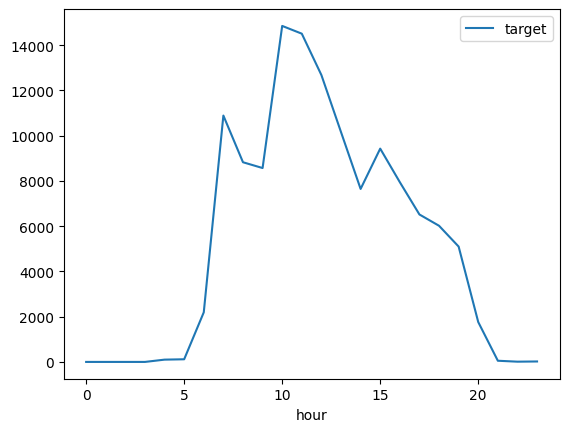

In [15]:
data_df_hours = data_df.groupby('hour')['target'].sum().reset_index()
print(data_df_hours)
data_df_hours.plot(x='hour')

In [16]:
# Понедельная нагрузка
fig = px.line(data_df.groupby('week_date')['target'].sum().reset_index(), y='target', x='week_date')
fig.show()

In [17]:
# Подневная нагрузка. Видно что есть взаимосвязь с рабочими днями
fig = px.line(data_df.groupby('day_date')['target'].sum().reset_index(), y='target', x='day_date')
fig.show()

#### Нарисуем нагрузки по дням недели.
Видно что нагрузка на понедельник самая высокая.  
Возможно, что за выходные много происходит событий и люди в понедельних реагируют на них и отигрывают

<Axes: xlabel='week_date', ylabel='target'>

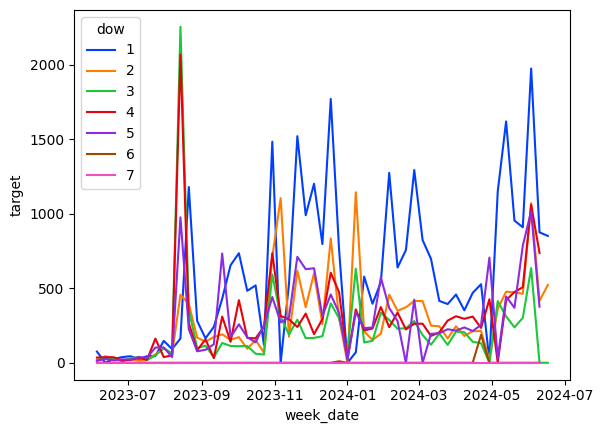

In [18]:
data_df_week = data_df.groupby(['week_date', 'dow'])['target'].sum().reset_index().fillna(0)
sns.lineplot(data=data_df_week.query('week_date>"2023-06-01"'), x='week_date', y='target', hue='dow', palette='bright')

In [19]:
# Посмотрим на один день с большой нагрузкой
data_df.query('day_date=="2023-08-16"')

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_10,...,feature_13,target,day_date,dow,week_date,mon_date,hour,doy,week_num,year
Date&Time,,,,,,,,,,,,,,,,,,,,,
2023-08-16 00:00:00,22968,NaN,NaN,14.12574,NaN,NaN,153002.95281,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,0,228,33,2023
2023-08-16 01:00:00,22969,NaN,NaN,16.48003,NaN,NaN,153007.66139,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,1,228,33,2023
2023-08-16 02:00:00,22970,NaN,NaN,18.83432,NaN,NaN,153019.43284,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,2,228,33,2023
2023-08-16 03:00:00,22971,NaN,NaN,9.41716,NaN,NaN,153028.85000,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,3,228,33,2023
2023-08-16 04:00:00,22972,NaN,NaN,9.41716,NaN,NaN,153035.91287,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,4,228,33,2023
2023-08-16 05:00:00,22973,NaN,NaN,25.89719,NaN,NaN,153047.68432,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,5,228,33,2023
2023-08-16 06:00:00,22974,NaN,NaN,32.96006,NaN,NaN,153061.81006,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,6,228,33,2023
2023-08-16 07:00:00,22975,NaN,NaN,35.31435,NaN,NaN,153075.93580,NaN,NaN,NaN,...,2,0.0,2023-08-16,3,2023-08-14,2023-08-01,7,228,33,2023
2023-08-16 08:00:00,22976,NaN,91.81731,42.37722,NaN,NaN,153101.83299,NaN,174.21746,NaN,...,2,261.0,2023-08-16,3,2023-08-14,2023-08-01,8,228,33,2023


In [20]:
# Возьмем один день для последующего анализа
sub_df = data_df.query('day_date=="2023-12-04"').fillna(0)

#### Нарисуем все фичи за все время
Многие фичи начинаются не с начала ряда

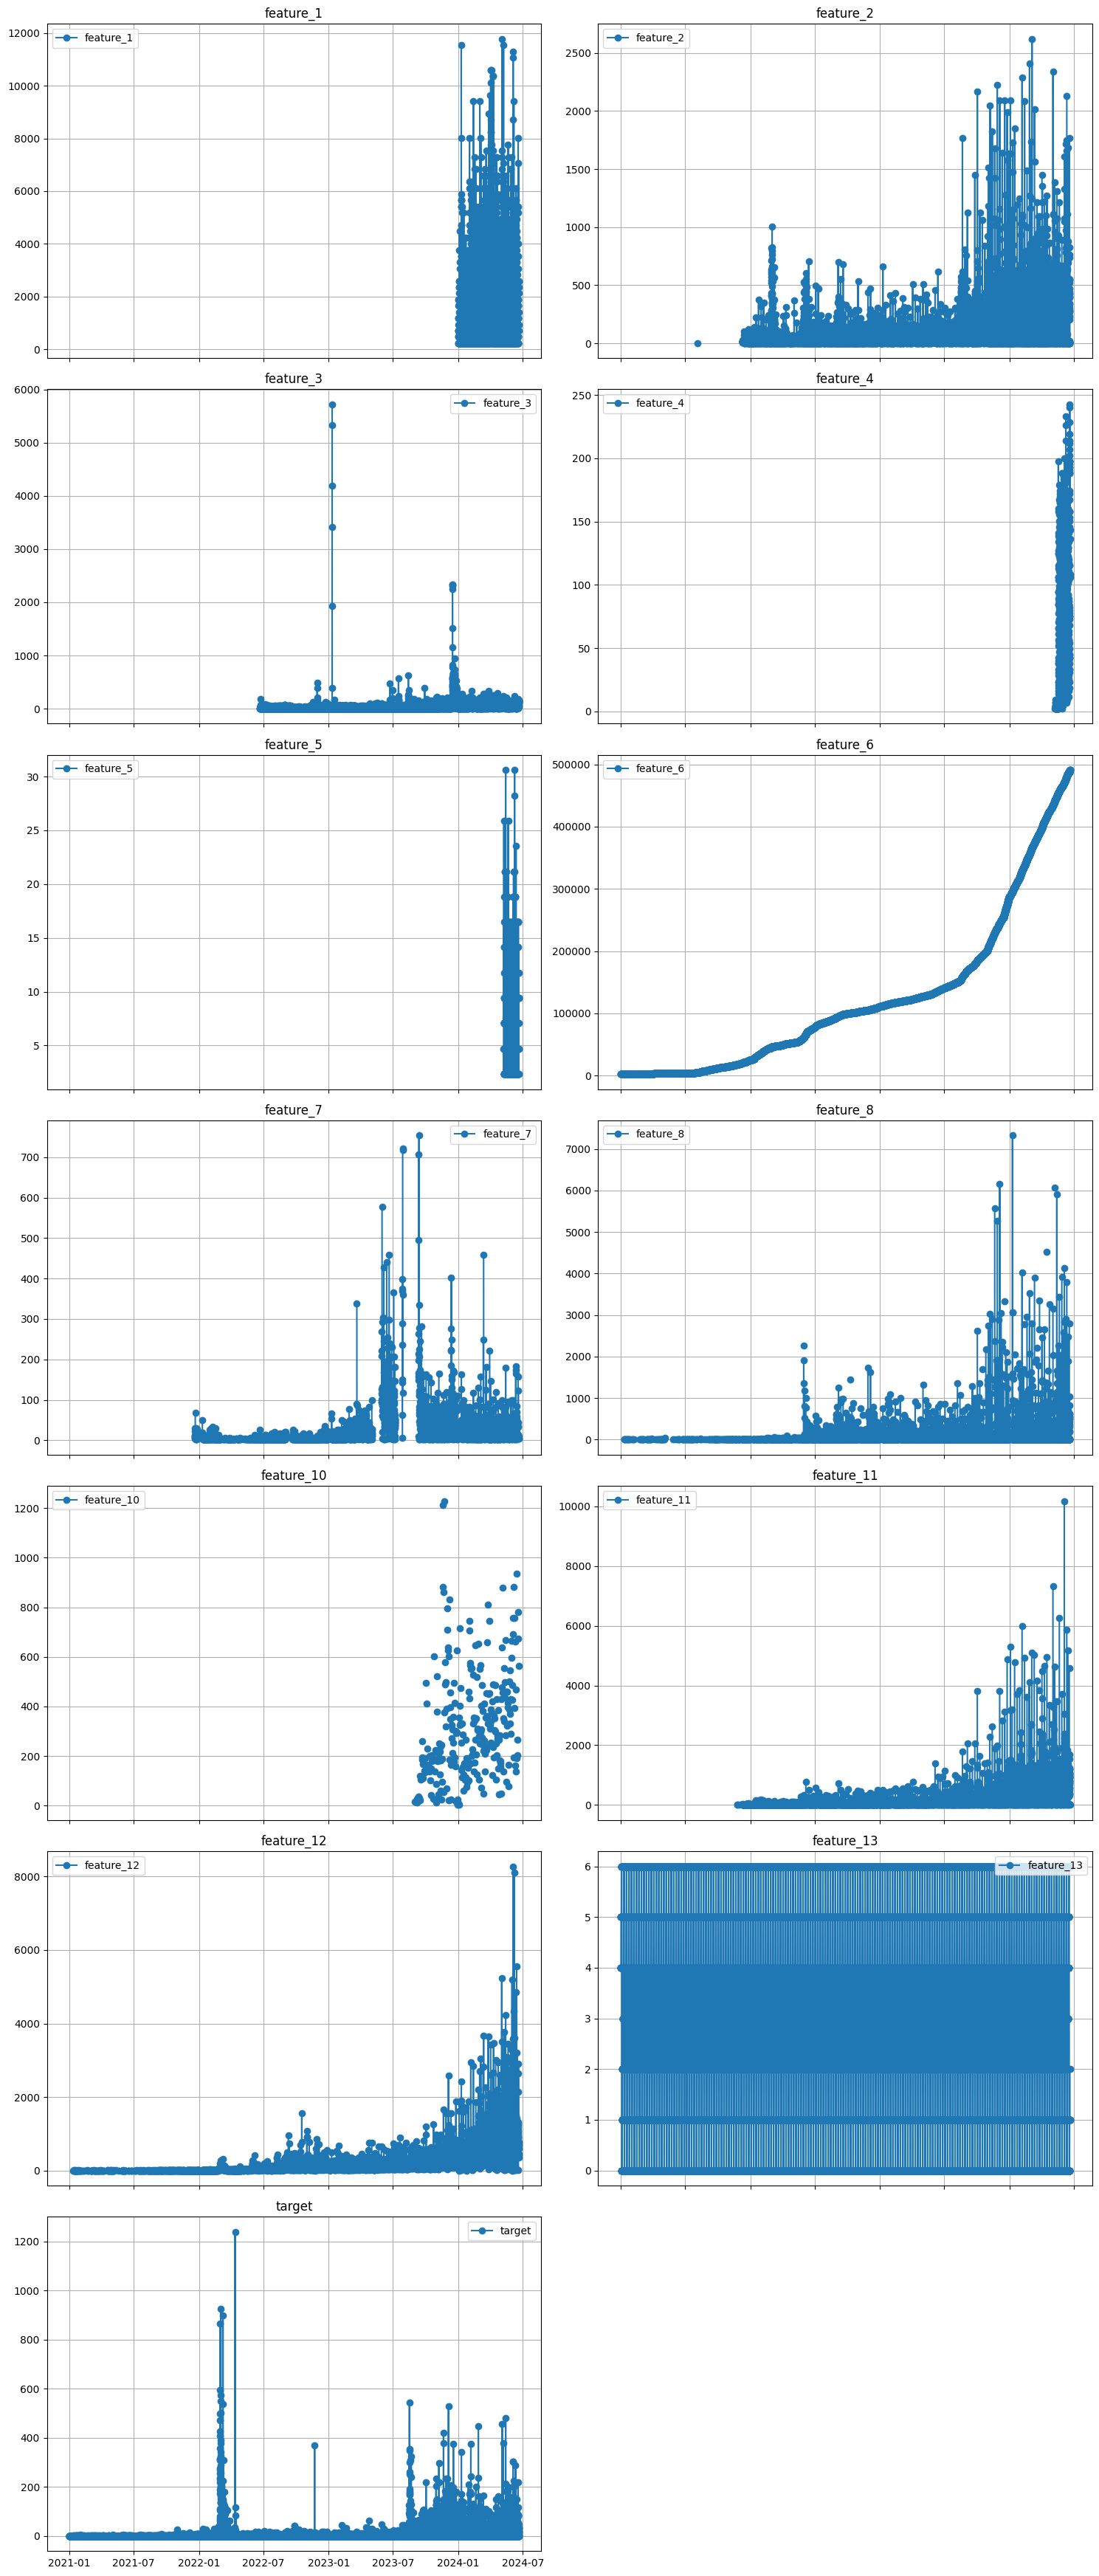

In [21]:
# Number of columns to plot
cols = ['feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'target']
n_columns = len(cols)
plt_cols = 2
n_rows = (n_columns + 2) // plt_cols  # Number of rows for the subplot grid
fig, axes = plt.subplots(n_rows, plt_cols, figsize=(15, 5 * n_rows), sharex=True)

# Flatten axes array if needed
axes = axes.flatten()

for i, col in enumerate(cols):  # Skip the date column
    ax = axes[i]
    ax.plot(data_df.index, data_df[col], marker='o', label=col)
    ax.set_title(col)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for ax in axes[n_columns:]:
    ax.set_visible(False)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

#### Нарисуем все фичи за один день

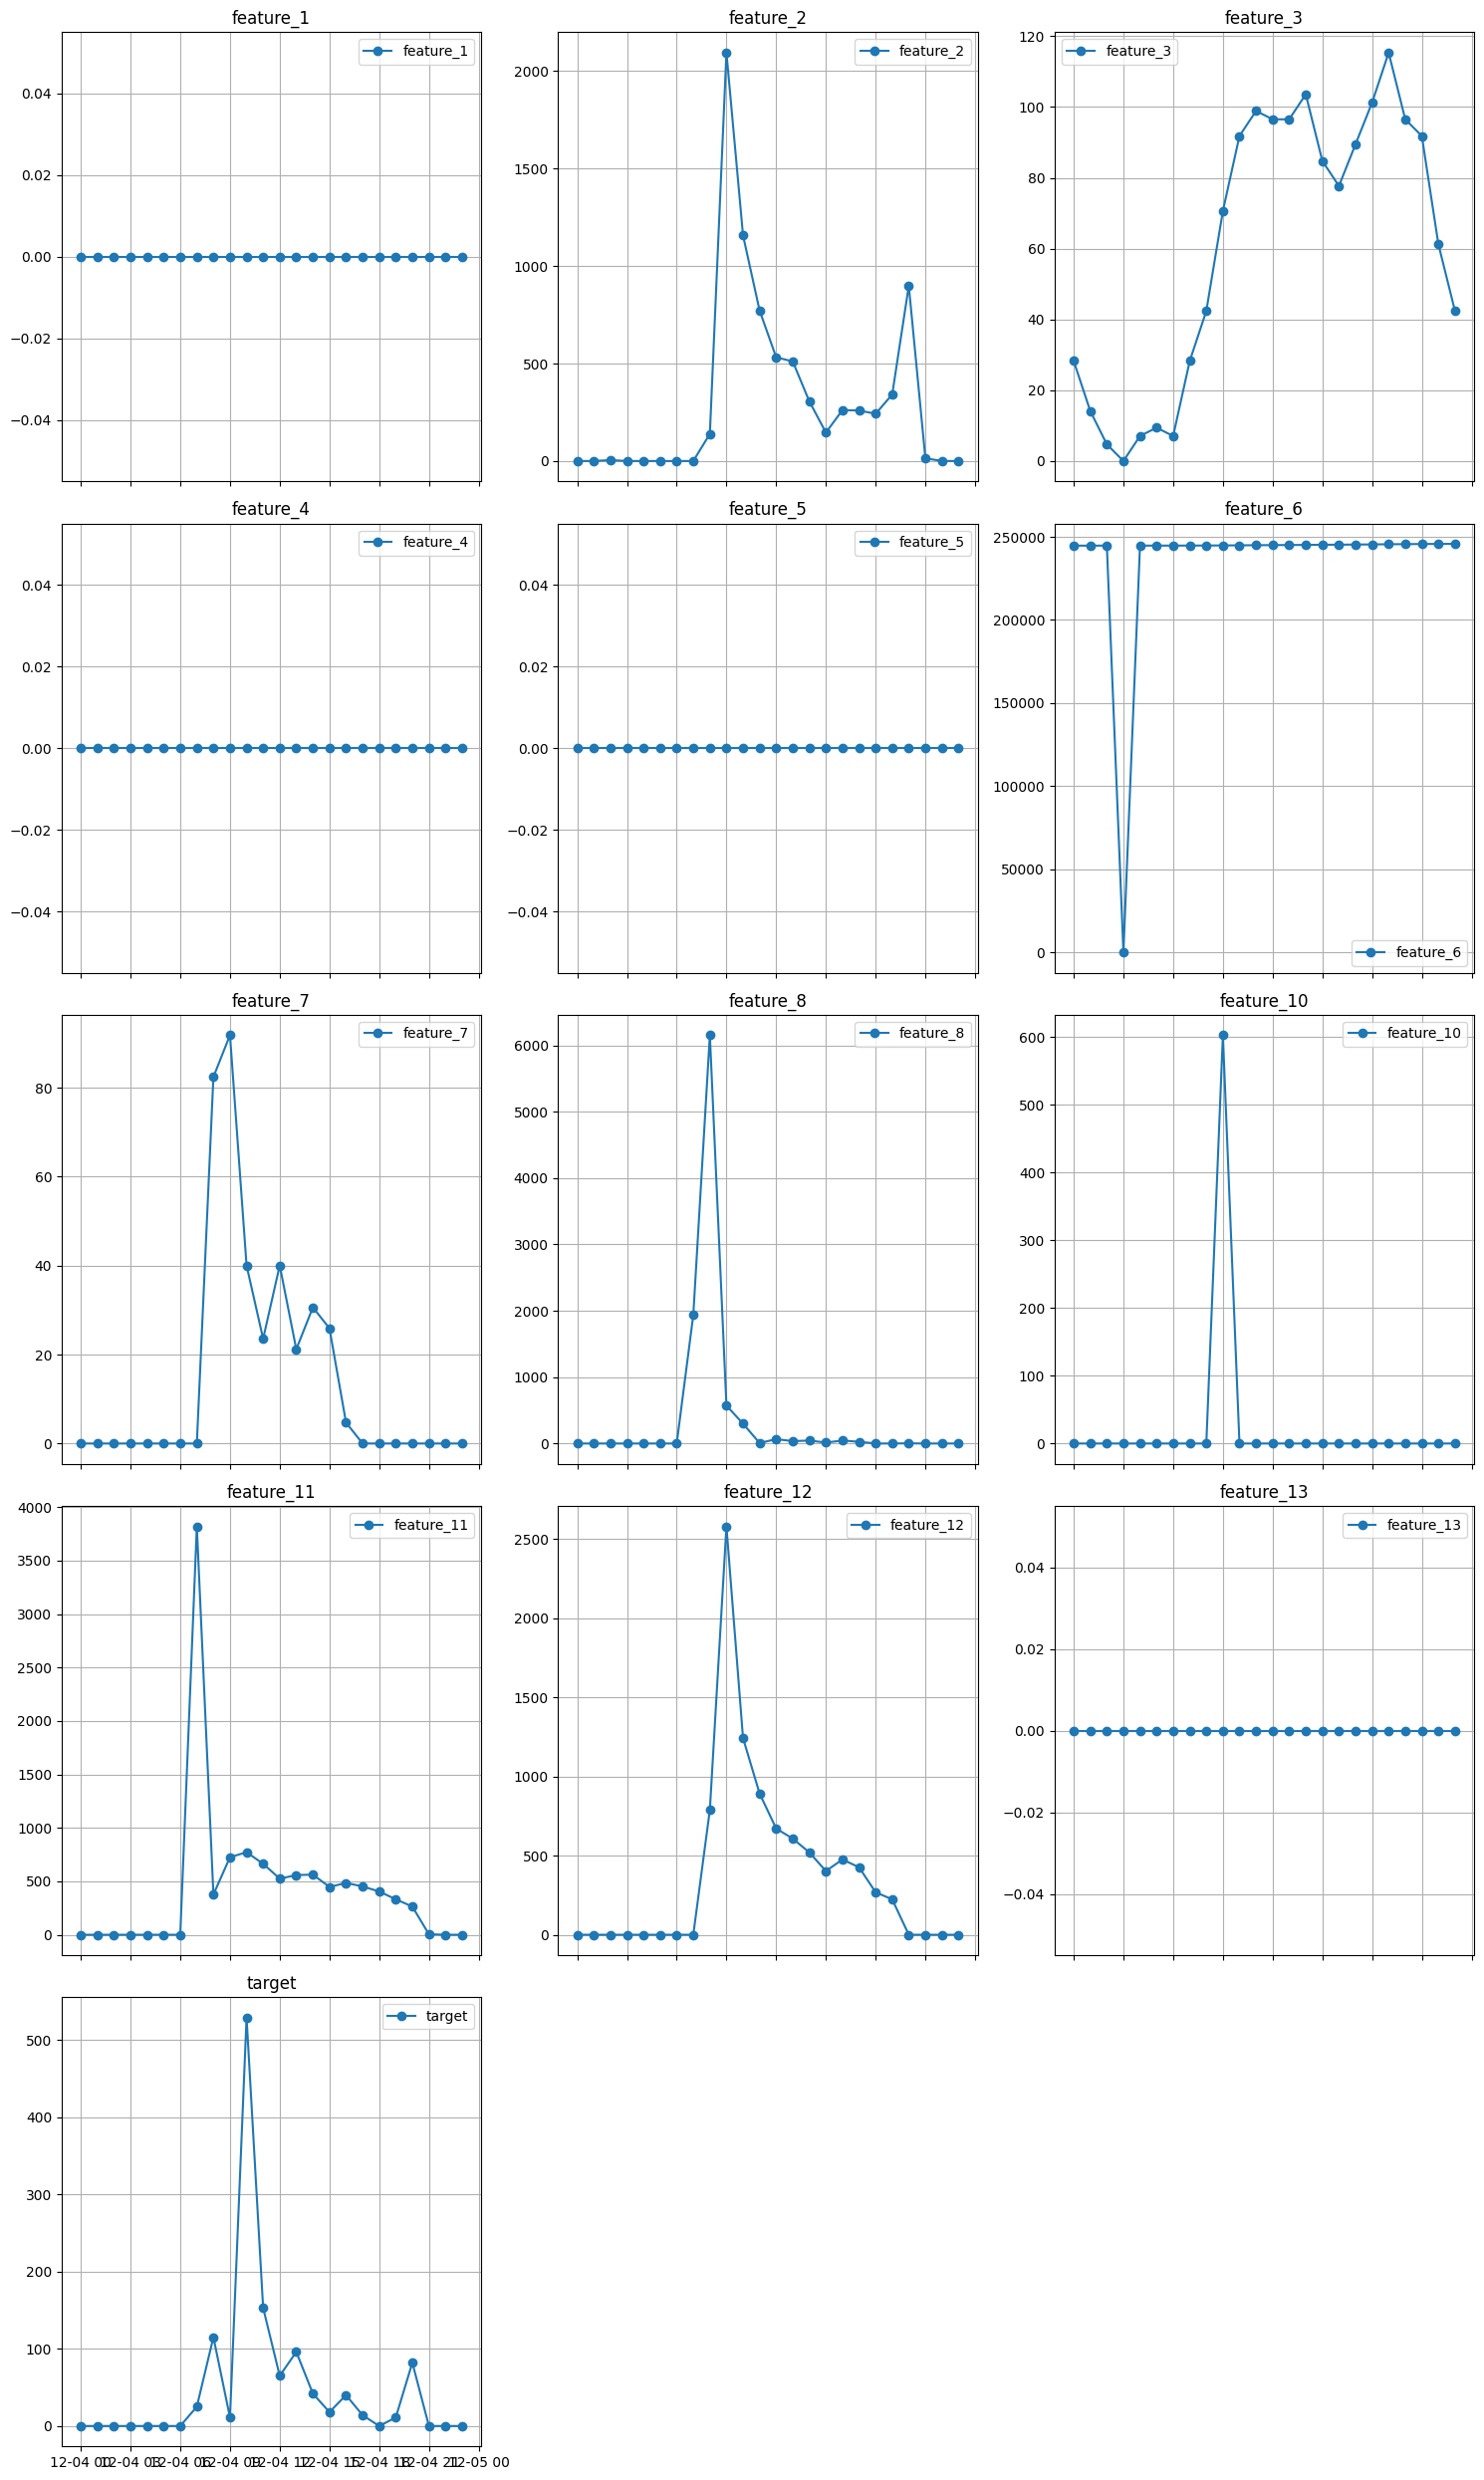

In [22]:
# Number of columns to plot
cols = ['feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_10',
       'feature_11', 'feature_12', 'feature_13', 'target']
n_columns = len(cols)
n_rows = (n_columns + 2) // 3  # Number of rows for the subplot grid
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 5 * n_rows), sharex=True)

# Flatten axes array if needed
axes = axes.flatten()

for i, col in enumerate(cols):  # Skip the date column
    ax = axes[i]
    ax.plot(sub_df.index, sub_df[col], marker='o', label=col)
    ax.set_title(col)
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for ax in axes[n_columns:]:
    ax.set_visible(False)

plt.xlabel('Date')
plt.tight_layout()
plt.show()

Видно что target лагово зависит от ряда фичей.
Не понятно что это за фичи и насколько вперед в будущее мы их можем знать.
1) Можно предположить что мы их знаем на бесконечное количество времени вперед и таким образом построить прогноз.  
2) Игнорируем все фичи и пробуем запрогнозить сам таргет на основании временных характеристик 

ЗАДАЧА: определить ДНИ, когда нагрузка на сервер будет **значительно выше стандартной**

#### Посмотрим попарное сравнение таргета с фичами за один день
Фичи визуально коррелируют с таргетом. 

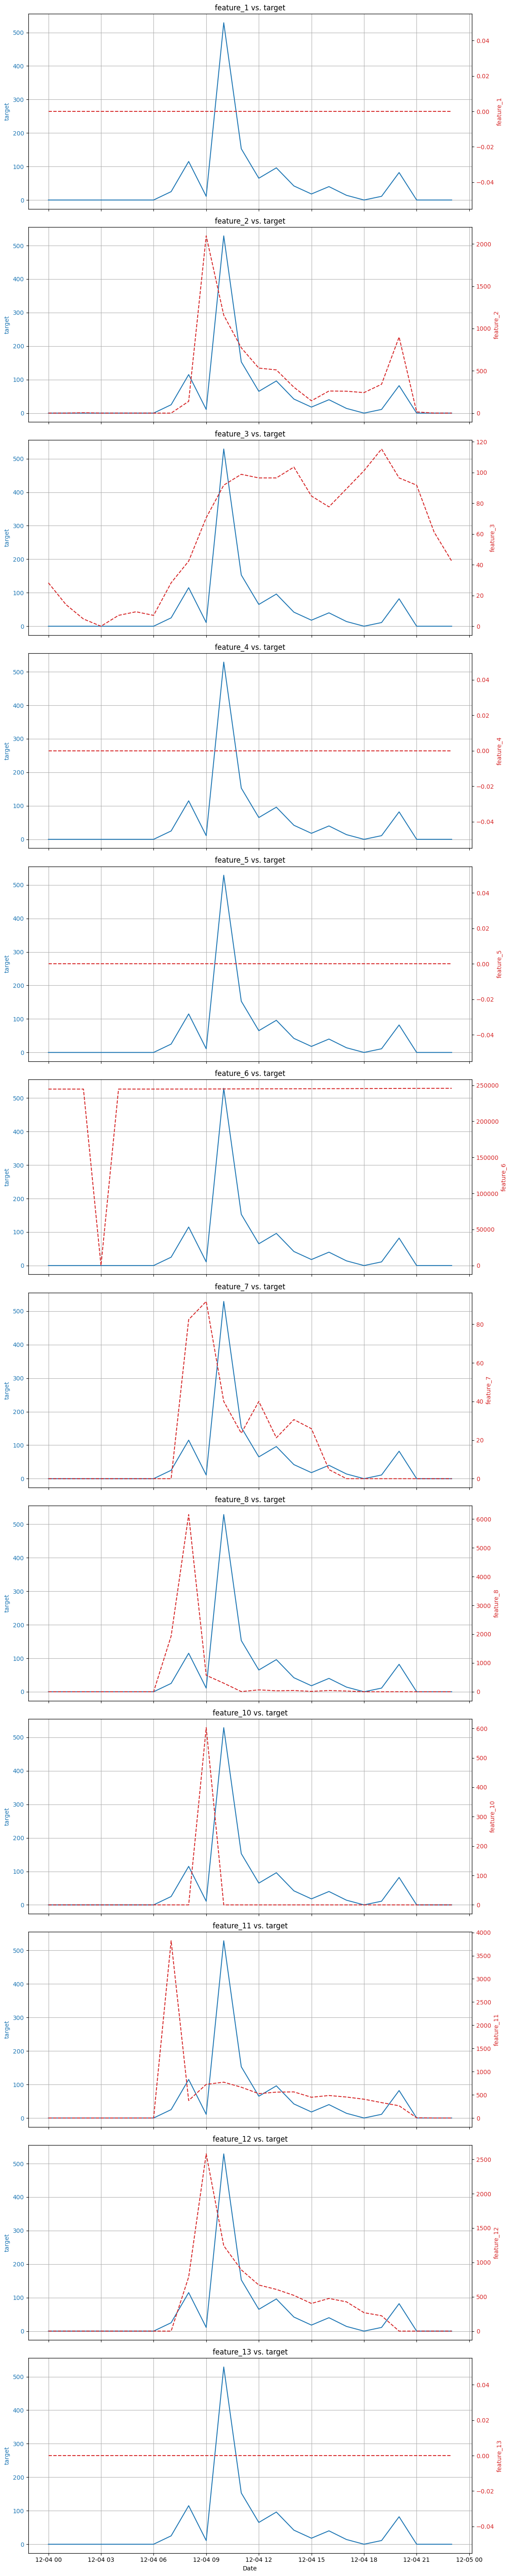

In [23]:
# List of feature columns
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_10',
       'feature_11', 'feature_12', 'feature_13']

# Create figure and axis objects
fig, axes = plt.subplots(len(features), 1, figsize=(12, 5 * len(features)), sharex=True)

for i, feature in enumerate(features):
    ax1 = axes[i]
    ax2 = ax1.twinx()  # Create a secondary y-axis

    # Plot target on the primary y-axis
    color = 'tab:blue'
    ax1.set_ylabel('target', color=color)
    ax1.plot(sub_df.index, sub_df['target'], color=color, label='target')
    ax1.tick_params(axis='y', labelcolor=color)
    
    # Plot feature on the secondary y-axis
    color = 'tab:red'
    ax2.set_ylabel(feature, color=color)
    ax2.plot(sub_df.index, sub_df[feature], color=color, linestyle='--', label=feature)
    ax2.tick_params(axis='y', labelcolor=color)
    
    # Add title and grid
    ax1.set_title(f'{feature} vs. target')
    ax1.grid(True)

# Set common x-axis label
axes[-1].set_xlabel('Date')

# Improve layout
plt.tight_layout()
plt.show()

* Зафитить профет и посмотреть на графики
* График по годам по неделям
* График по годам по дням

## Автокорреляции

#### Автокорреляции на почасовых данных ожидаемо показывают взаимосвязь от предыдущего часа и от часа 24 часа назад

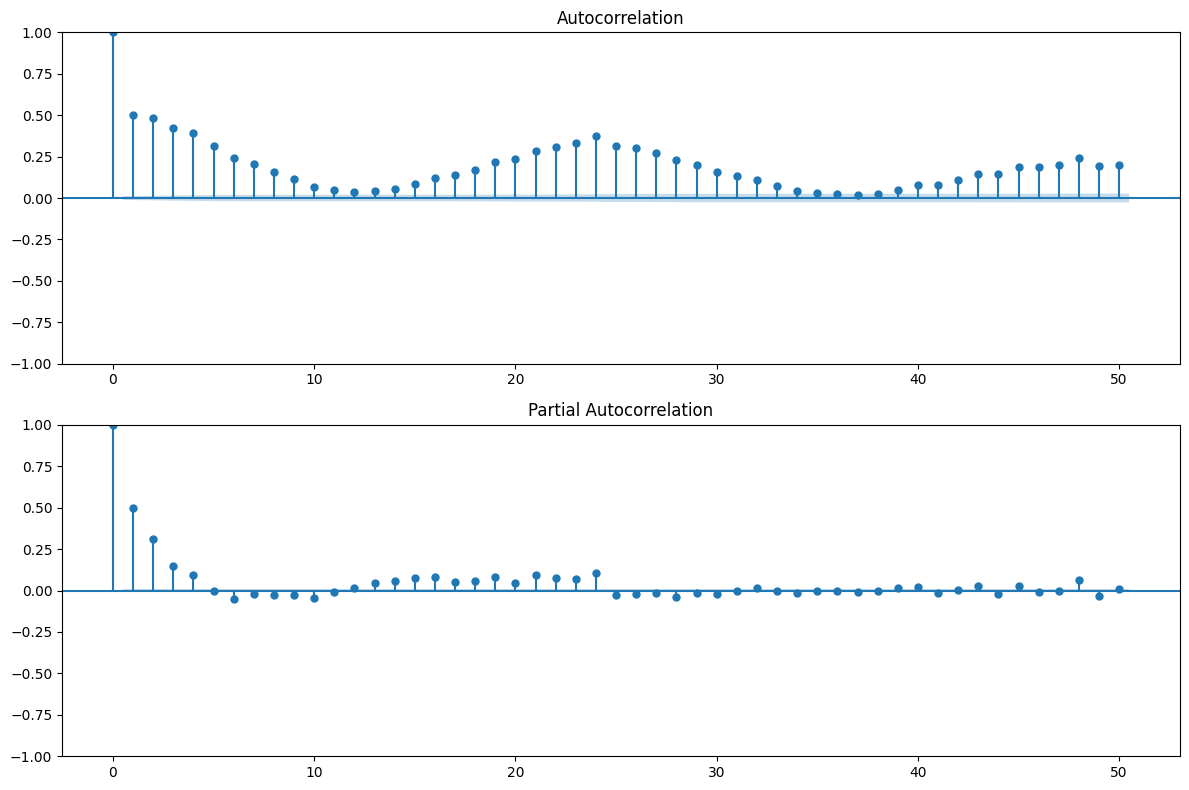

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Строим графики АКФ и ЧАКФ
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Автокорреляционная функция (АКФ)
plot_acf(data_df['target'], ax=axes[0], lags=50)  

# Частная автокорреляционная функция (ЧАКФ)
plot_pacf(data_df['target'], ax=axes[1], lags=50)

# Показать графики
plt.tight_layout()
plt.show()

#### Автокорреляция доказывает взаимосвязь между последними днями и аналогичному дню прошлой недели

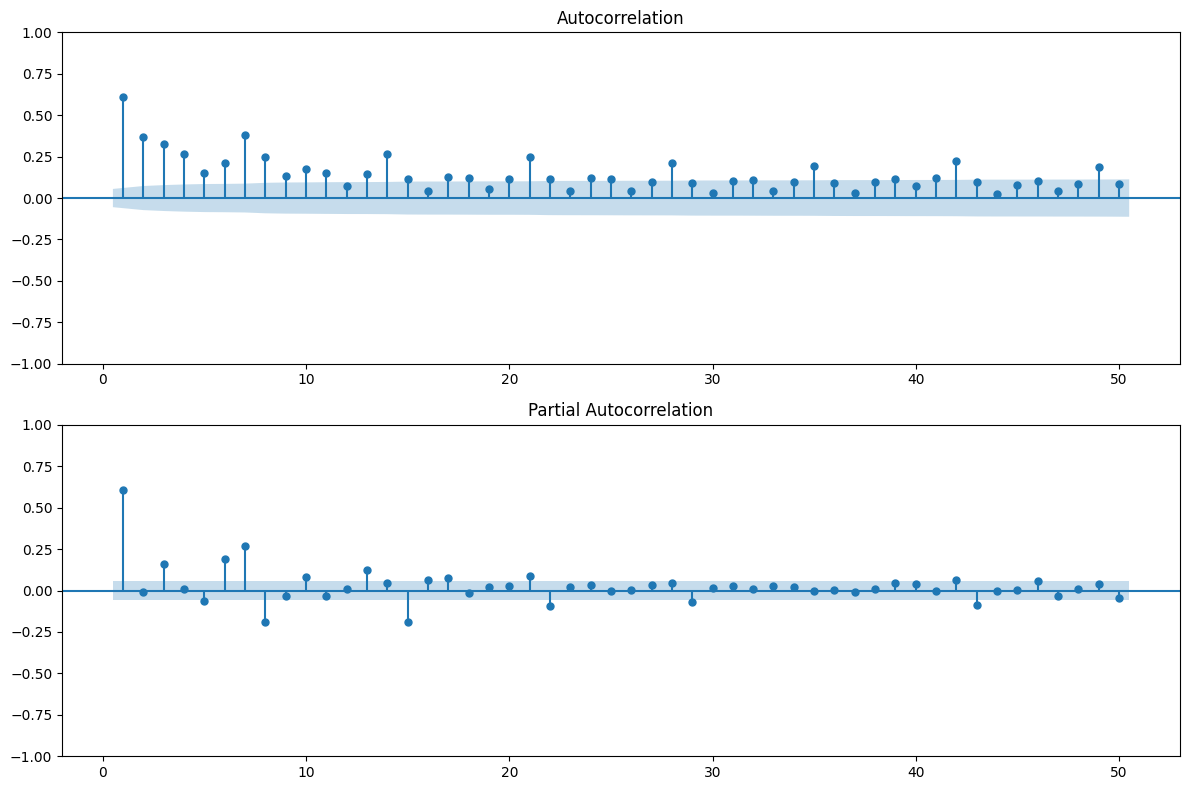

In [25]:
# Строим графики АКФ и ЧАКФ
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Автокорреляционная функция (АКФ)
plot_acf(
    data_df.groupby('day_date')['target'].sum().reset_index()['target'], 
    ax=axes[0], 
    lags=50,
    zero=False,
)  

# Частная автокорреляционная функция (ЧАКФ)
plot_pacf(
    data_df.groupby('day_date')['target'].sum().reset_index()['target'], 
    ax=axes[1], 
    lags=50,
    zero=False,
)

# Показать графики
plt.tight_layout()
plt.show()

#### На недельках не видим годовую сезонность

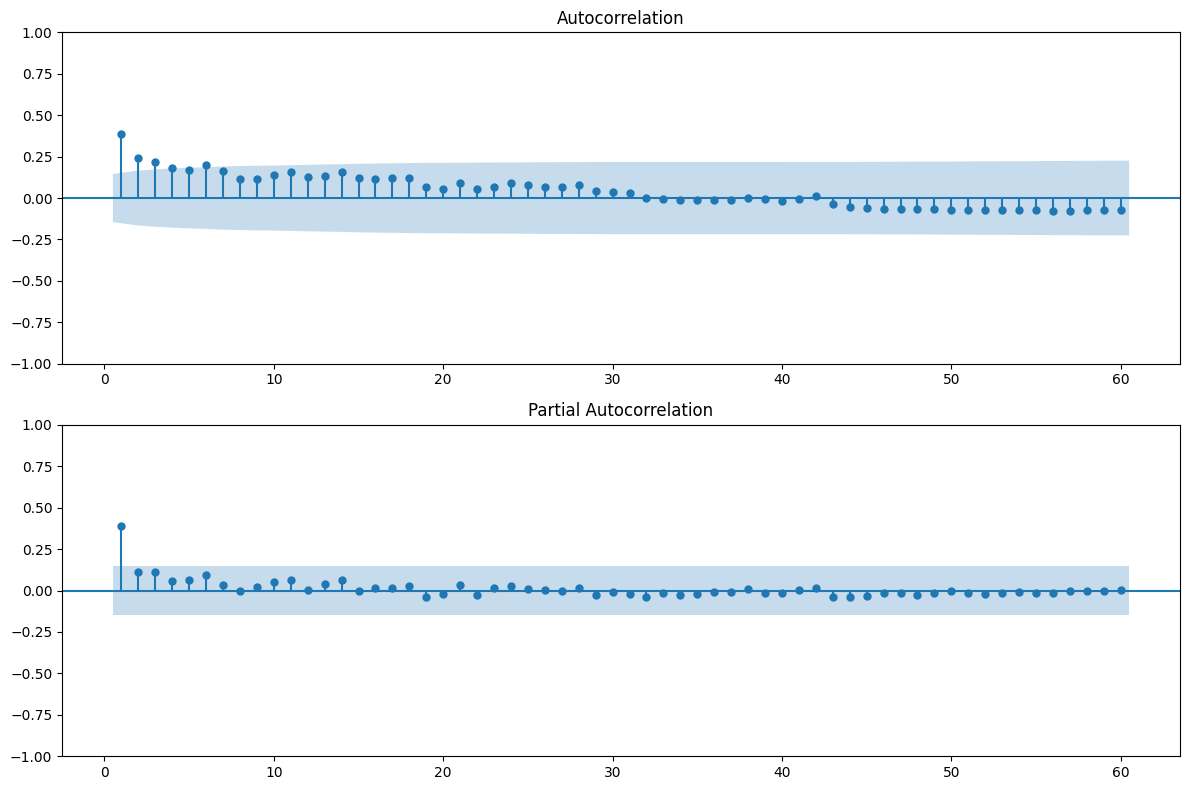

In [26]:
# Строим графики АКФ и ЧАКФ
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Автокорреляционная функция (АКФ)
plot_acf(
    data_df.groupby('week_date')['target'].sum().reset_index()['target'], 
    ax=axes[0], 
    lags=60,
    zero=False,
)  

# Частная автокорреляционная функция (ЧАКФ)
plot_pacf(
    data_df.groupby('week_date')['target'].sum().reset_index()['target'], 
    ax=axes[1], 
    lags=60,
    zero=False,
)

# Показать графики
plt.tight_layout()
plt.show()

#### Посмотрим на годовую сезонность
не прослеживается

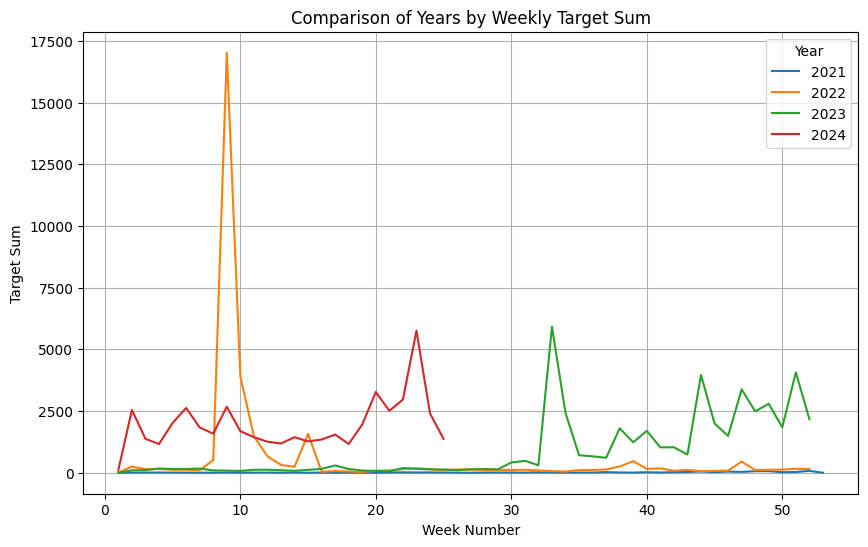

In [27]:
# Группируем по неделям и годам и суммируем значения 'target'
weekly_data = data_df.groupby(['week_num', 'year'])['target'].sum().unstack()  # 'unstack' делает столбцы по годам

# Строим график
weekly_data.plot(figsize=(10, 6))

# Добавляем подписи осей и заголовок
plt.xlabel('Week Number')
plt.ylabel('Target Sum')
plt.title('Comparison of Years by Weekly Target Sum')

# Добавляем сетку для улучшения визуализации
plt.grid(True)

# Добавляем легенду (по годам)
plt.legend(title='Year', loc='best')

# Показываем график
plt.show()

## Построим графики prophet

Профет просто так не зайдет из-за большого количества нулей.
Если хотим его в продашн пробовать, то нужно заранее знать когда у нас точно нули (а это не всегда очевидно из-за переноса рабочих дней итп). Если обучать на чистых данных, плюс сделать всякие conditional сезонности, то будет лучше

In [28]:
data_df['ds'] = data_df.index
data_df = data_df.rename(columns={'target': 'y'})

14:10:29 - cmdstanpy - INFO - Chain [1] start processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing


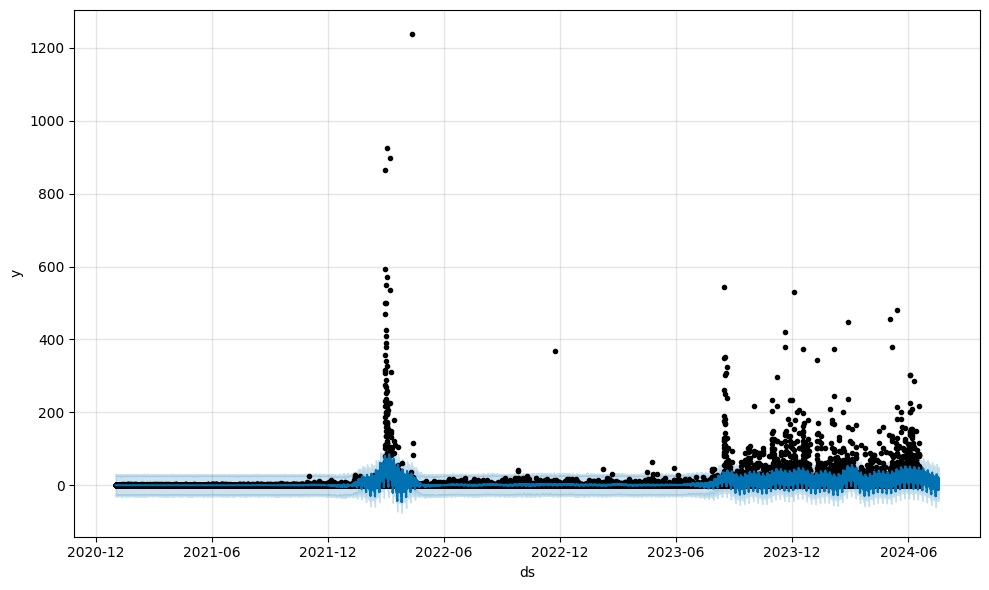

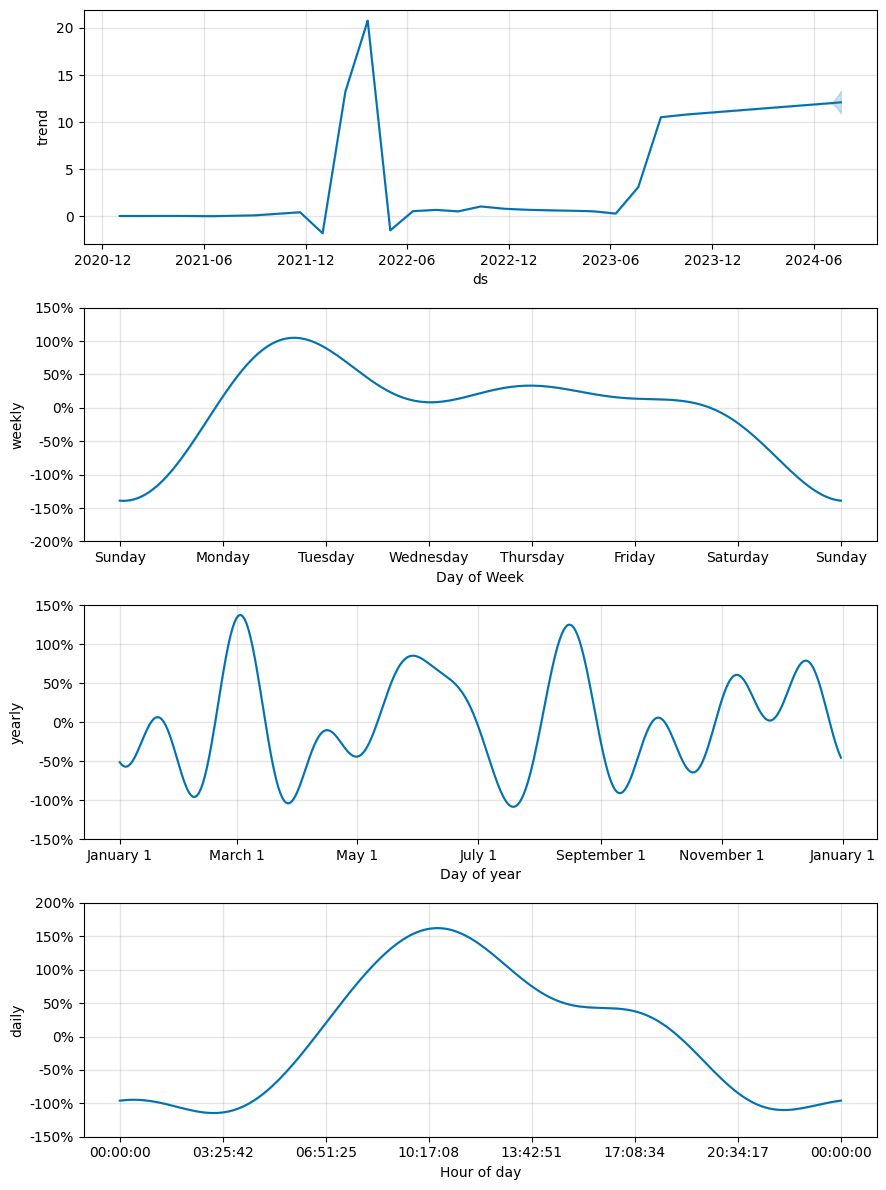

In [29]:
from prophet import Prophet

model = Prophet(
    daily_seasonality=True,   # Включаем дневную сезонность
    weekly_seasonality=True,  # Включаем недельную сезонность
    yearly_seasonality=True,  # Включаем годовую сезонность
    seasonality_mode='multiplicative', # Помечаем как мультипликативную
)

# Обучаем модель
model.fit(data_df)

# Прогнозируем будущее на 30 дней вперёд (почасовые данные)
future = model.make_future_dataframe(periods=24 * 30, freq='H')  # Прогноз на 30 дней (почасовые данные)
forecast = model.predict(future)

# Визуализация трендов и прогнозов
model.plot(forecast)
plt.show()

# Визуализация сезонностей
model.plot_components(forecast)
plt.show()

In [30]:
data_df['is_weekday'] = (data_df['ds'].dt.dayofweek <= 5)
data_df['in_hours_range'] = ((data_df['hour'] >= 6) & (data_df['hour'] <= 20))

14:11:08 - cmdstanpy - INFO - Chain [1] start processing
14:11:08 - cmdstanpy - INFO - Chain [1] done processing


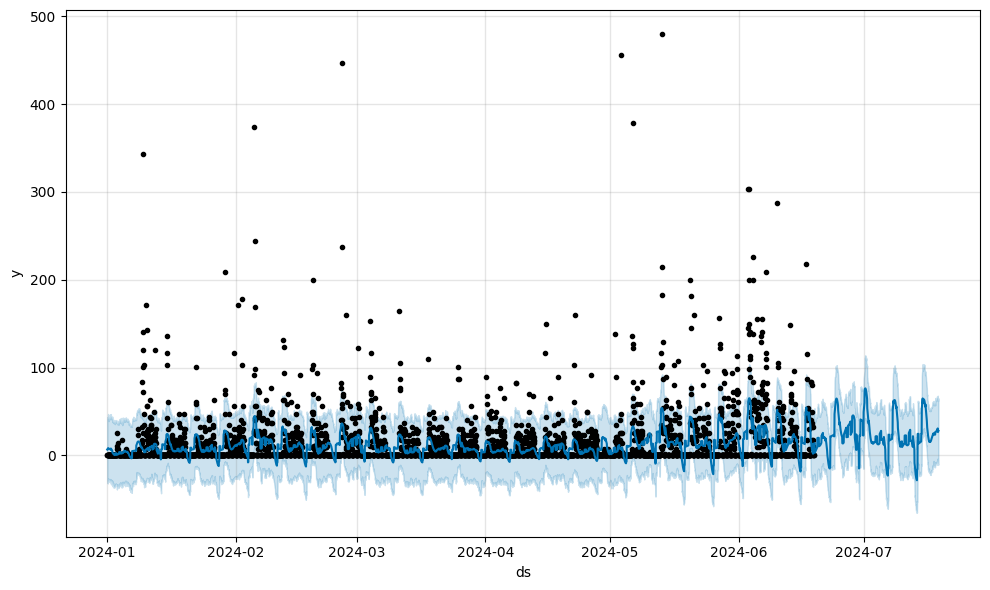

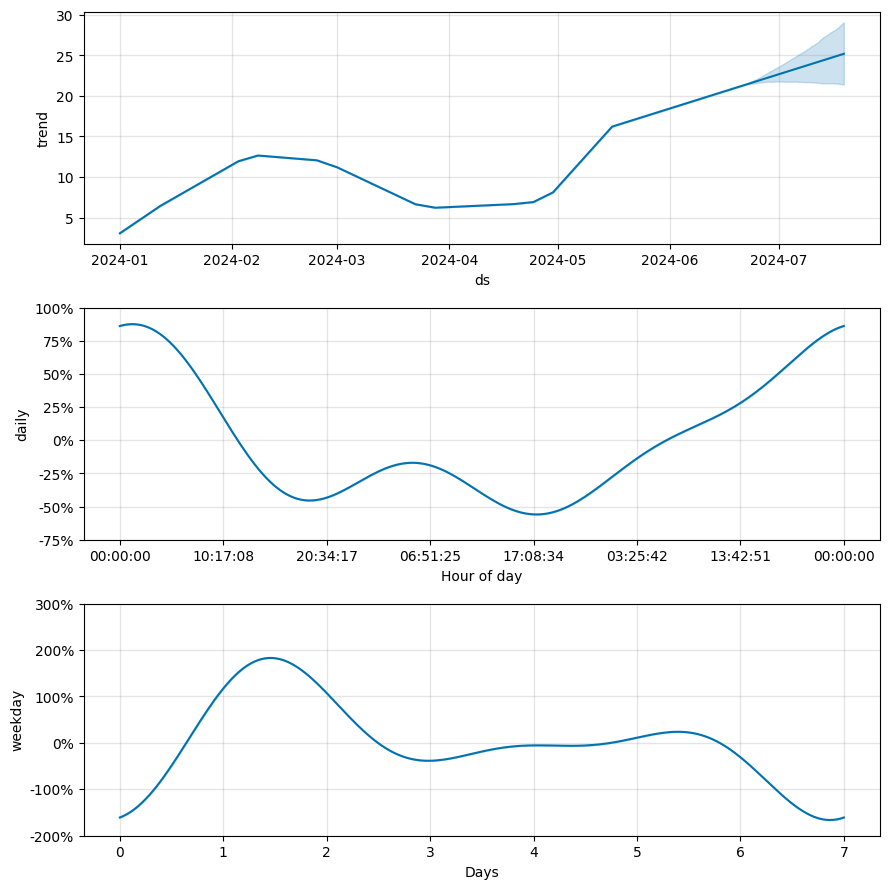

In [31]:
model = Prophet(
    daily_seasonality=False,   # Выключаем дневную сезонность
    weekly_seasonality=False,  # Выключаем недельную сезонность
    yearly_seasonality=False,  # Выключаем годовую сезонность
    seasonality_mode='multiplicative', 
)


model.add_seasonality(name='weekday', period=7, fourier_order=3, condition_name='is_weekday')
model.add_seasonality(name='daily', period=24, fourier_order=3, condition_name='in_hours_range')

# Обучаем модель
model.fit(data_df.query('year>=2024'))

# Прогнозируем будущее на 30 дней вперёд (почасовые данные)
future = model.make_future_dataframe(periods=24 * 30, freq='H')  # Прогноз на 30 дней (почасовые данные)
future['is_weekday'] = (future['ds'].dt.dayofweek <= 5)
future['hour'] = future['ds'].dt.hour
future['in_hours_range'] = ((future['hour'] >= 6) & (future['hour'] <= 20))

forecast = model.predict(future)

# Визуализация трендов и прогнозов
model.plot(forecast)
plt.show()

# Визуализация сезонностей
model.plot_components(forecast)
plt.show()

In [32]:
data_df

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_10,...,dow,week_date,mon_date,hour,doy,week_num,year,ds,is_weekday,in_hours_range
Date&Time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2020-12-28,2021-01-01,0,1,53,2021,2021-01-01 00:00:00,True,False
2021-01-01 01:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2020-12-28,2021-01-01,1,1,53,2021,2021-01-01 01:00:00,True,False
2021-01-01 02:00:00,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2020-12-28,2021-01-01,2,1,53,2021,2021-01-01 02:00:00,True,False
2021-01-01 03:00:00,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2020-12-28,2021-01-01,3,1,53,2021,2021-01-01 03:00:00,True,False
2021-01-01 04:00:00,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2020-12-28,2021-01-01,4,1,53,2021,2021-01-01 04:00:00,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18 20:00:00,30356,706.287,18.83432,157.73743,195.40607,2.35429,490659.93319,NaN,NaN,NaN,...,2,2024-06-17,2024-06-01,20,170,25,2024,2024-06-18 20:00:00,True,True
2024-06-18 21:00:00,30357,2589.719,NaN,153.02885,143.61169,4.70858,490754.10479,NaN,NaN,NaN,...,2,2024-06-17,2024-06-01,21,170,25,2024,2024-06-18 21:00:00,True,False
2024-06-18 22:00:00,30358,NaN,NaN,113.00592,136.54882,11.77145,490817.67062,NaN,NaN,NaN,...,2,2024-06-17,2024-06-01,22,170,25,2024,2024-06-18 22:00:00,True,False


In [33]:
data_df.query('year>=2023').fillna(0).set_index('ds').reindex(future['ds']).fillna(method='ffill')

,Unnamed: 0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_10,...,day_date,dow,week_date,mon_date,hour,doy,week_num,year,is_weekday,in_hours_range
ds,,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,26280.0,0.000,0.0,2.35429,0.00000,0.00000,0.00000,0.0,0.0,0.0,...,2024-01-01,1.0,2024-01-01,2024-01-01,0.0,1.0,1,2024.0,True,False
2024-01-01 01:00:00,26281.0,470.858,0.0,9.41716,0.00000,0.00000,287477.64332,0.0,0.0,0.0,...,2024-01-01,1.0,2024-01-01,2024-01-01,1.0,1.0,1,2024.0,True,False
2024-01-01 02:00:00,26282.0,706.287,0.0,9.41716,0.00000,0.00000,287484.70619,0.0,0.0,0.0,...,2024-01-01,1.0,2024-01-01,2024-01-01,2.0,1.0,1,2024.0,True,False
2024-01-01 03:00:00,26283.0,0.000,0.0,7.06287,0.00000,0.00000,287491.76906,0.0,0.0,0.0,...,2024-01-01,1.0,2024-01-01,2024-01-01,3.0,1.0,1,2024.0,True,False
2024-01-01 04:00:00,26284.0,0.000,0.0,7.06287,0.00000,0.00000,287494.12335,0.0,0.0,0.0,...,2024-01-01,1.0,2024-01-01,2024-01-01,4.0,1.0,1,2024.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-18 20:00:00,30360.0,2118.861,0.0,51.79438,108.29734,9.41716,490883.59074,0.0,0.0,0.0,...,2024-06-19,3.0,2024-06-17,2024-06-01,0.0,171.0,25,2024.0,True,False
2024-07-18 21:00:00,30360.0,2118.861,0.0,51.79438,108.29734,9.41716,490883.59074,0.0,0.0,0.0,...,2024-06-19,3.0,2024-06-17,2024-06-01,0.0,171.0,25,2024.0,True,False
2024-07-18 22:00:00,30360.0,2118.861,0.0,51.79438,108.29734,9.41716,490883.59074,0.0,0.0,0.0,...,2024-06-19,3.0,2024-06-17,2024-06-01,0.0,171.0,25,2024.0,True,False


In [34]:
future.index = future['ds']
future

,ds,is_weekday,hour,in_hours_range
ds,,,,
2024-01-01 00:00:00,2024-01-01 00:00:00,True,0,False
2024-01-01 01:00:00,2024-01-01 01:00:00,True,1,False
2024-01-01 02:00:00,2024-01-01 02:00:00,True,2,False
2024-01-01 03:00:00,2024-01-01 03:00:00,True,3,False
2024-01-01 04:00:00,2024-01-01 04:00:00,True,4,False
...,...,...,...,...
2024-07-18 20:00:00,2024-07-18 20:00:00,True,20,True
2024-07-18 21:00:00,2024-07-18 21:00:00,True,21,False
2024-07-18 22:00:00,2024-07-18 22:00:00,True,22,False


14:11:13 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1] done processing


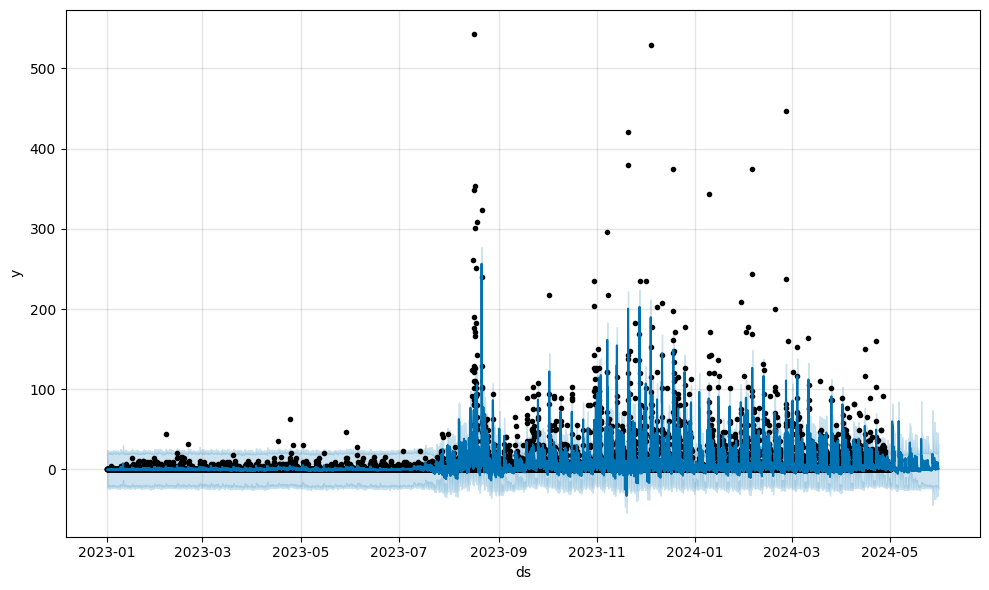

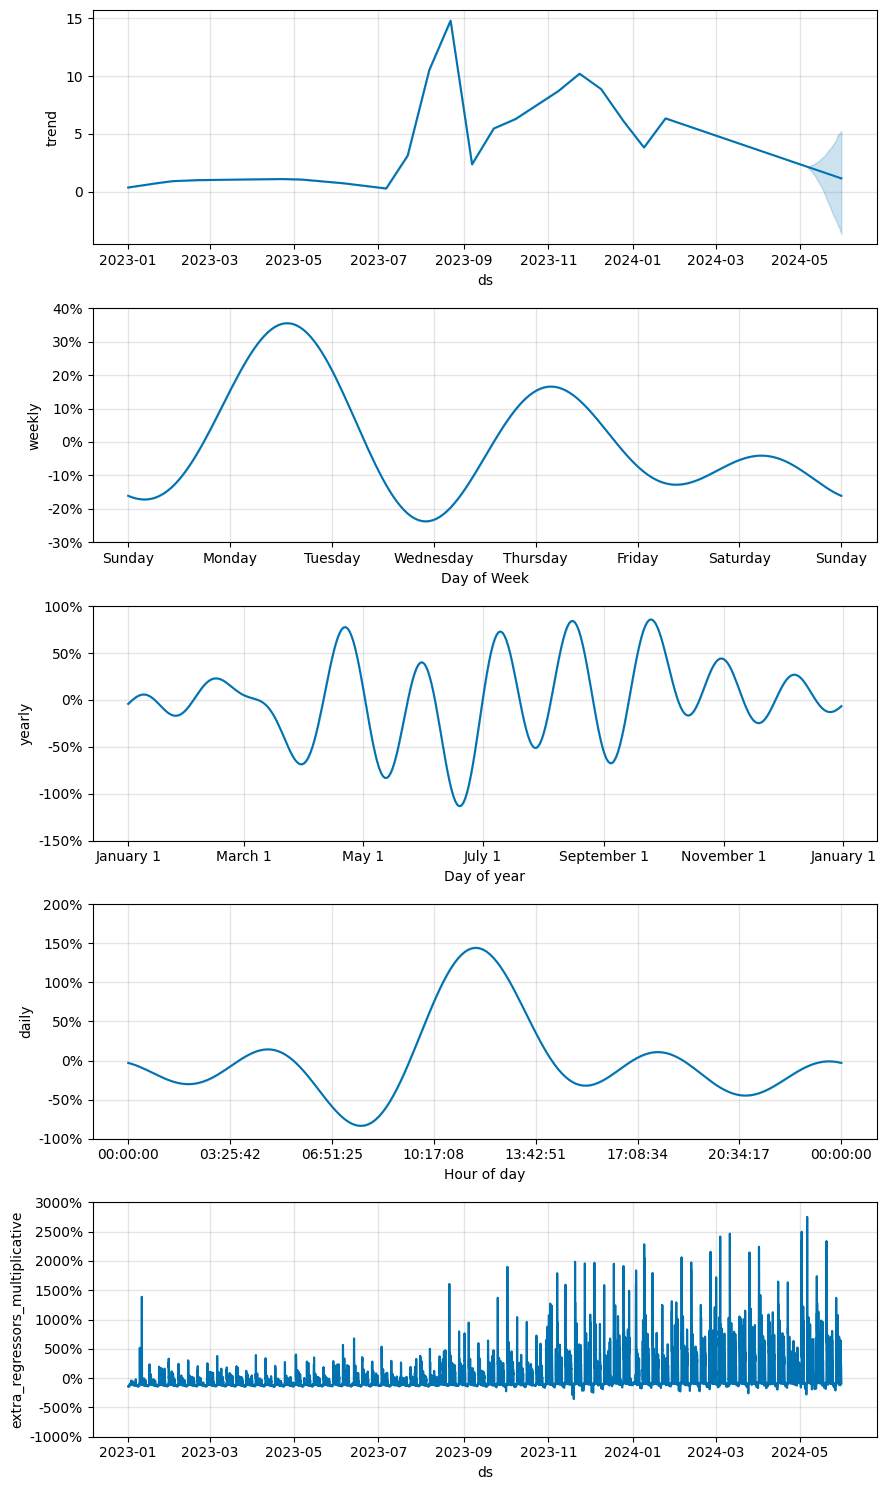

In [35]:
from prophet import Prophet

model = Prophet(
    daily_seasonality=True,   # Включаем дневную сезонность
    weekly_seasonality=True,  # Включаем недельную сезонность
    yearly_seasonality=True,  # Включаем годовую сезонность
    seasonality_mode='multiplicative', # Помечаем как мультипликативную
)

# Добавляем дополнительные признаки как регрессоры
additional_features = ['feature_1', 'feature_2', 'feature_3', 'feature_4',
                       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_10',
                       'feature_11', 'feature_12', 'feature_13']

for feature in additional_features:
    model.add_regressor(feature)


# Обучаем модель
model.fit(data_df.query('year>=2023 and ds<"2024-05-01"').fillna(0))

# Прогнозируем будущее на 30 дней вперёд (почасовые данные)
future = model.make_future_dataframe(periods=24 * 30, freq='H')  # Прогноз на 30 дней (почасовые данные)
future.index = future['ds']
for feature in additional_features:
    # Используем последнюю известную информацию для будущих периодов
    # Или можете использовать метод интерполяции для более точных значений
    future[feature] = data_df.query('year>=2023').fillna(0).set_index('ds').reindex(future['ds']).fillna(method='ffill')[feature]
forecast = model.predict(future)

# Визуализация трендов и прогнозов
model.plot(forecast)
plt.show()

# Визуализация сезонностей
model.plot_components(forecast)
plt.show()

14:11:29 - cmdstanpy - INFO - Chain [1] start processing
14:11:29 - cmdstanpy - INFO - Chain [1] done processing


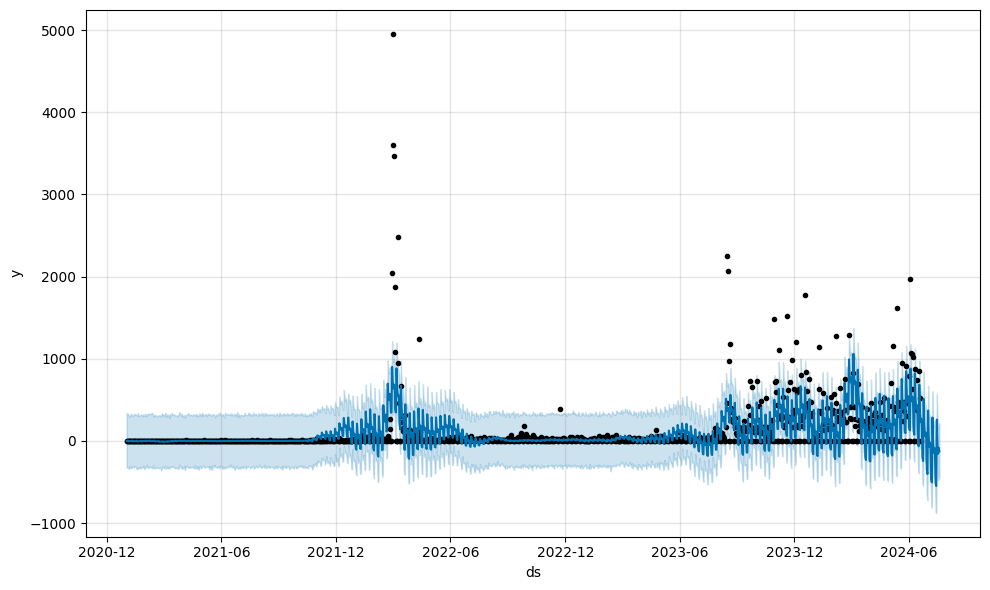

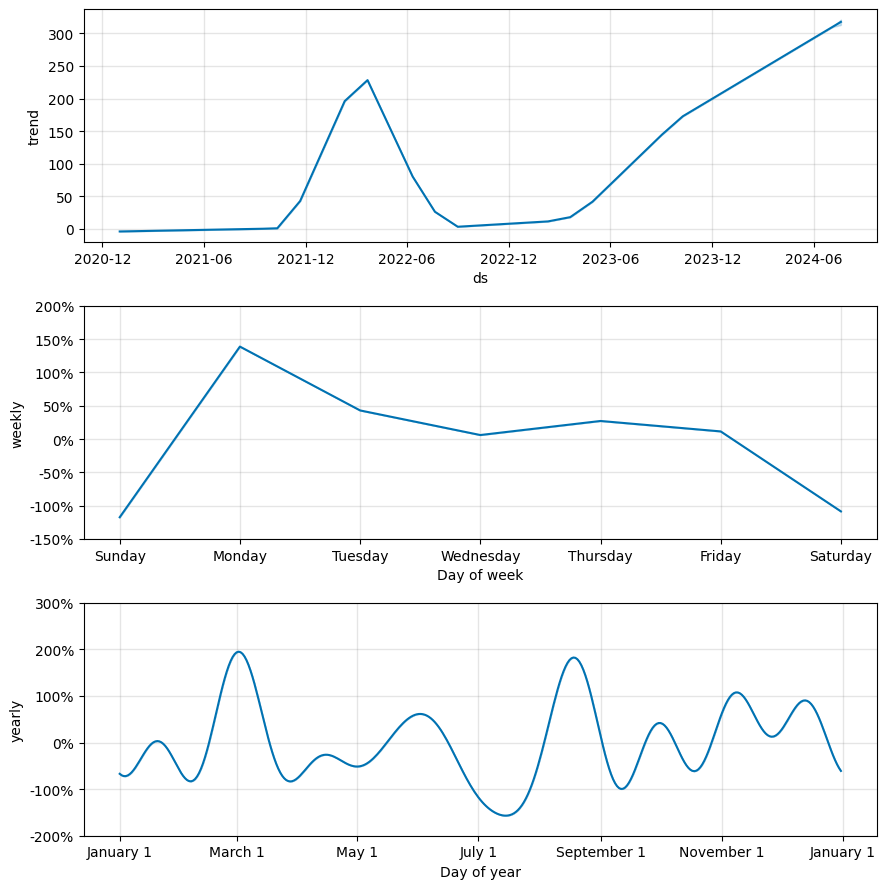

In [36]:
from prophet import Prophet

model = Prophet(
    daily_seasonality=False,   # Выключаем дневную сезонность
    weekly_seasonality=True,  # Включаем недельную сезонность
    yearly_seasonality=True,  # Включаем годовую сезонность
    seasonality_mode='multiplicative', # Помечаем как мультипликативную
)

# Обучаем модель
model.fit(data_df.groupby('day_date')['y'].sum().reset_index().rename(columns={'day_date': 'ds'}))

# Прогнозируем будущее на 30 дней вперёд (почасовые данные)
future = model.make_future_dataframe(periods=30, freq='D')  # Прогноз на 30 дней
forecast = model.predict(future)

# Визуализация трендов и прогнозов
model.plot(forecast)
plt.show()

# Визуализация сезонностей
model.plot_components(forecast)
plt.show()